# Make a simple Convolutional network for the bus data

## Initialization

In [12]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../misc')
sys.path.append("../")
from MoviaBusDataset import MoviaBusDataset
from BaseNetwork import BaseNetwork
import torch
from torch.nn import Linear, Sequential, ReLU, L1Loss
from torch.optim import Adam, lr_scheduler
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import data using the MoviaBusDataset

In [48]:
previous_timesteps = 6
prediction_steps = 3
batch_size = 25
num_epochs = 100

train = MoviaBusDataset('../data/train', interpolation=True, prev_timesteps=previous_timesteps, max_future_time_steps=prediction_steps, timeofday = False)
test = MoviaBusDataset('../data/test', interpolation=True, prev_timesteps=previous_timesteps, max_future_time_steps=prediction_steps, timeofday = False)

train.normalize()
test.normalize(train.mean, train.std)

## The Model

In [120]:
from CNN import CNN
net = CNN(previous_timesteps,num_hidden=100)

optimizer_fun = lambda param : Adam(param, lr=1e-2, weight_decay=1e-4)
scheduler_fun = lambda optim : lr_scheduler.StepLR(optim, step_size=10, gamma=0.1)
criterion = L1Loss()

## Training the network

In [121]:
net.train_network(train, test,batch_size=batch_size, 
                  num_epochs=30,
                  optimizer_fun=optimizer_fun,
                  scheduler_fun=scheduler_fun,
                  criterion=criterion)

epoch =  0  train loss = 1.202   test loss = 0.918   output_std = 0.456
epoch =  2  train loss = 0.752   test loss = 0.764   output_std = 0.205
epoch =  4  train loss = 0.703   test loss = 0.753   output_std = 0.276
epoch =  6  train loss = 0.686   test loss = 0.759   output_std = 0.205
epoch =  8  train loss = 0.669   test loss = 0.762   output_std = 0.308
epoch = 10  train loss = 0.636   test loss = 0.779   output_std = 0.301
epoch = 12  train loss = 0.534   test loss = 0.769   output_std = 0.327
epoch = 14  train loss = 0.459   test loss = 0.775   output_std = 0.339
epoch = 16  train loss = 0.413   test loss = 0.782   output_std = 0.371
epoch = 18  train loss = 0.400   test loss = 0.791   output_std = 0.358
epoch = 20  train loss = 0.383   test loss = 0.799   output_std = 0.371
epoch = 22  train loss = 0.317   test loss = 0.793   output_std = 0.373
epoch = 24  train loss = 0.287   test loss = 0.794   output_std = 0.382
epoch = 26  train loss = 0.270   test loss = 0.795   output_std 

## Evaluate the network on a test dataset 

In [122]:
net.get_MAE_score(timestep=1)

1.7435022592544556

### Example of modelled data vs real data for one road segment 

<IPython.core.display.Javascript object>


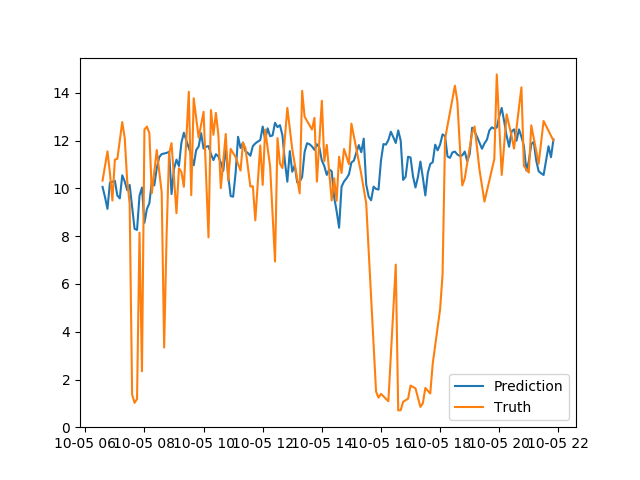

In [123]:
%matplotlib notebook

net.visualize_road(timesteps=1, road=23)